In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
from math import sqrt

In [2]:
TRADING_DAYS_IN_YEAR = 242

## Probability Density Function - Normal Distribution

In [3]:
math.exp(1)

2.718281828459045

In [4]:
math.e

2.718281828459045

In [5]:
math.pi

3.141592653589793

In [6]:
def pdf(x: np.ndarray, std_dev: float = 1, mean: int = 0) -> float:
    return (1 / (std_dev * np.sqrt(2 * math.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

In [7]:
x = np.linspace(-5, 5, 1001)

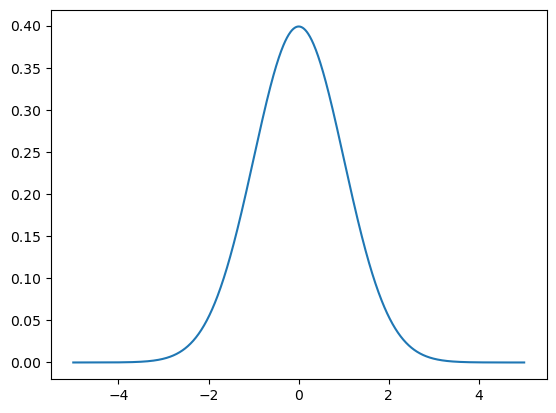

In [8]:
plt.plot(x, pdf(x))

In [9]:
samples = np.random.normal(0, 0.1, 10000000)

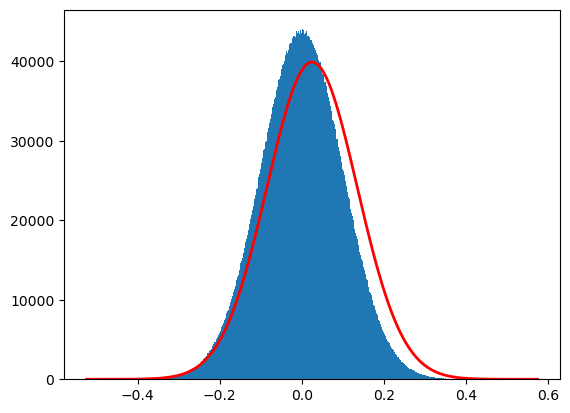

In [10]:
counts, bins, ignored = plt.hist(samples, bins=1000)
plt.plot(bins, pdf(x) * 100000, linewidth=2, color='r')

## Brownian Motion

In [18]:
px_0 = 50
sigma = 0.1  # AKA annualized standard deviation of returns
mu = 0.07  # AKA annualized expected return
n_days = 1000

In [19]:
def gen_returns(n: int, mu: float, daily_std_dev: float) -> np.ndarray:
    return np.random.normal(mu, daily_std_dev, n)

In [20]:
def gen_prices(initial_price: float, daily_returns: np.ndarray):
    prices = np.array([initial_price])
    for r in daily_returns:
        new_price = prices[-1] * (1 + r)
        prices = np.append(prices, new_price)
    return prices

In [21]:
# calculate daily standard deviation of returns
daily_std_dev = sigma * math.sqrt(1/TRADING_DAYS_IN_YEAR)
# calculate expected one-day return
# NOT SURE THAT THIS IS RIGHT!!!
# INSTEAD, IS IT? expected_one_day_return = mu / TRADING_DAYS_IN_YEAR
exp_daily_return = (mu - (sigma**2 / 2)) * (1 / TRADING_DAYS_IN_YEAR)

In [22]:
# get sample one-period returns
returns = np.random.normal(exp_daily_return, daily_std_dev, n_days)

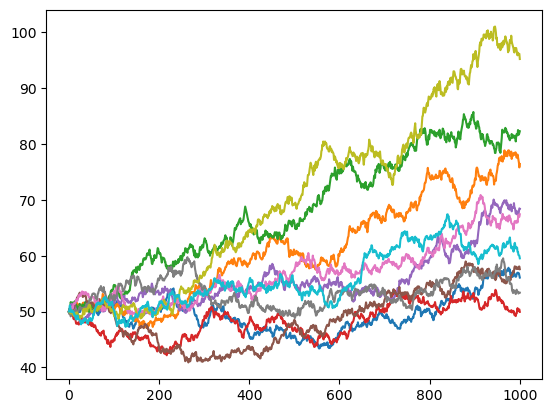

In [23]:
n_assets = 10
for _ in range(n_assets):
    price_series = gen_prices(px_0, gen_returns(n_days, exp_daily_return, daily_std_dev))
    plt.plot(price_series)